<h1 align=center><font size = 5>Comparing Neighborhoods of Newton, MA</font></h1>

# 1. Purpose & Introduction

This notebook provides a comparison between the different neighborhoods (also known as villages) in the city of Newton, MA. The comparison is used to help  families who want to move to Newton to choose a neighborhood that is best suited for their needs. Generally, a family will want to look at what different neighborhoods have to offer. For example, they may want to be close to public transit, they may want to have play grounds nearby if they have little kids. A couple without kids may want to have access to a lot of restaurants. A family also will consider housing price if they want to buy a house. They will also want to know the crime data of different neighborhoods. 

# 2. Data Source and Description

The data of interest for a family include nearby amenities/venues (data can be obtained from Foursquare) and housing prices, which will be obtained from the website Redfin, which has a lot of data on sold house prices. The crime data of the city will be obtained as well. 

The venues data from Foursquare will be obtained to determine the top venues in a neighborhood and group neighborhood into cluster. This data will help a family to see if the amenities in that neighborhood meet their needs. The house price data will help a family to determine if they can afford a house of interest in such neighborhood. The crime data help a family to determine how safe such a neighborhood is. 

### Importing Important Libraries for Use

In [1]:
#Before we get the data and start exploring it, let's download all the dependencies that we will need.
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!conda install -c conda-forge shapely --yes
#!conda install -c conda-forge geopandas --yes
#!conda install -c conda-forge geojsonio --yes
print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

### Getting Information about the Different Neighborhoods from Foursquare

Download the geojson file from Newton, MA git hub

In [2]:
import requests

url = 'https://raw.githubusercontent.com/NewtonMAGIS/GISData/master/Zip%20Codes/ZipCodes.geojson'
#url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
results = requests.get(url)
newtonData = results.json()


newtonData['features'][1]['properties']

{'Village_PO': 'CHESTNUT HILL', 'ZIPCODE': '02467'}

Reading the file to extract the different villages

In [3]:
nbdataDict = {"Village":[], 'ZipCode':[]}
for i in newtonData['features']:
    print(i['properties'])
    nbdataDict["Village"].append(i['properties']['Village_PO'])
    nbdataDict['ZipCode'].append(i['properties']['ZIPCODE'])  
nbDf = pd.DataFrame.from_dict(nbdataDict)
nbDf

{'Village_PO': 'BRIGHTON', 'ZIPCODE': '02135'}
{'Village_PO': 'CHESTNUT HILL', 'ZIPCODE': '02467'}
{'Village_PO': 'WABAN', 'ZIPCODE': '02468'}
{'Village_PO': 'WABAN', 'ZIPCODE': '02468'}
{'Village_PO': 'AUBURNDALE', 'ZIPCODE': '02466'}
{'Village_PO': 'CHESTNUT HILL', 'ZIPCODE': '02467'}
{'Village_PO': 'NEWTON', 'ZIPCODE': '02458'}
{'Village_PO': 'NEWTON UPPER FALLS', 'ZIPCODE': '02464'}
{'Village_PO': 'NEWTON LOWER FALLS', 'ZIPCODE': '02462'}
{'Village_PO': 'NEWTONVILLE', 'ZIPCODE': '02460'}
{'Village_PO': 'WEST NEWTON', 'ZIPCODE': '02465'}
{'Village_PO': 'NEWTON CENTER', 'ZIPCODE': '02459'}
{'Village_PO': 'NEWTON HIGHLANDS', 'ZIPCODE': '02461'}


,Village,ZipCode
0,BRIGHTON,02135
1,CHESTNUT HILL,02467
2,WABAN,02468
3,WABAN,02468
4,AUBURNDALE,02466
5,CHESTNUT HILL,02467
6,NEWTON,02458
7,NEWTON UPPER FALLS,02464
8,NEWTON LOWER FALLS,02462
9,NEWTONVILLE,02460


### Getting the latitude and longitude of each village
Getting the village names, zip code and coordinates

In [4]:
cleanNbDF = nbDf.drop_duplicates().reset_index()
del cleanNbDF['index']
cleanNbDF

,Village,ZipCode
0,BRIGHTON,02135
1,CHESTNUT HILL,02467
2,WABAN,02468
3,AUBURNDALE,02466
4,NEWTON,02458
5,NEWTON UPPER FALLS,02464
6,NEWTON LOWER FALLS,02462
7,NEWTONVILLE,02460
8,WEST NEWTON,02465
9,NEWTON CENTER,02459


In [5]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim 
geolocator = Nominatim()

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [6]:
coordinate = {"ZipCode": [], "Latitude":[], 'Longitude':[]}
#for zipcode in (cleanNbDF['ZipCode']):
for zipcode, v in zip(cleanNbDF['ZipCode'], cleanNbDF['Village']):
    address = v + ', Newton, MA, ' + str(zipcode)
    location = geolocator.geocode(address)
    coordinate['Latitude'].append(location.latitude)
    coordinate['Longitude'].append(location.longitude)
    coordinate['ZipCode'].append(zipcode)
coorDF = pd.DataFrame.from_dict(coordinate)
coorDF.head(11)

,ZipCode,Latitude,Longitude
0,02135,42.350097,-71.156442
1,02467,42.330653,-71.162276
2,02468,42.327348,-71.229276
3,02466,42.346446,-71.248693
4,02458,42.310000,-71.214000
5,02464,42.313986,-71.219499
6,02462,42.329172,-71.258548
7,02460,42.350097,-71.203666
8,02465,42.350097,-71.232833
9,02459,42.330653,-71.199499


In [7]:
cleanNbDFwithCoor = pd.merge(cleanNbDF, coorDF, on = 'ZipCode', how = 'left')
cleanNbDFwithCoor

,Village,ZipCode,Latitude,Longitude
0,BRIGHTON,02135,42.350097,-71.156442
1,CHESTNUT HILL,02467,42.330653,-71.162276
2,WABAN,02468,42.327348,-71.229276
3,AUBURNDALE,02466,42.346446,-71.248693
4,NEWTON,02458,42.310000,-71.214000
5,NEWTON UPPER FALLS,02464,42.313986,-71.219499
6,NEWTON LOWER FALLS,02462,42.329172,-71.258548
7,NEWTONVILLE,02460,42.350097,-71.203666
8,WEST NEWTON,02465,42.350097,-71.232833
9,NEWTON CENTER,02459,42.330653,-71.199499


### Create a Map of Newton with Different Villages using Folium

In [8]:
latitude = cleanNbDFwithCoor['Latitude'][4];
longitude = cleanNbDFwithCoor['Longitude'][4]
# create map of New York using latitude and longitude values
map_Newton = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, village, zipcode in zip(cleanNbDFwithCoor['Latitude'], cleanNbDFwithCoor['Longitude'], cleanNbDFwithCoor['Village'],
                                     cleanNbDFwithCoor['ZipCode']):
    label = '{}, {}'.format(village, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Newton)  
    
map_Newton

## Define Foursquare Credentials and Version

In [9]:
LIMIT = 300
radius = 1600
CLIENT_ID = 'ERVR3FIDFM1HN22OBNBPE4O1X3TBMR4IXTC5LRM51RLHHJ0G' # your Foursquare ID
CLIENT_SECRET = 'URA5FQSSJQ2W0TNUGAEH1ZOBYSSIAYZEMQOXJA1LKOKPEJ4D' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ERVR3FIDFM1HN22OBNBPE4O1X3TBMR4IXTC5LRM51RLHHJ0G
CLIENT_SECRET:URA5FQSSJQ2W0TNUGAEH1ZOBYSSIAYZEMQOXJA1LKOKPEJ4D


### Exploring Newton Villages

Create functions to get venues for different villages

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Village', 
                  'Village Latitude', 
                  'Village Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
newton_venues = getNearbyVenues(names=cleanNbDFwithCoor['Village'],
                                   latitudes=cleanNbDFwithCoor['Latitude'],
                                   longitudes=cleanNbDFwithCoor['Longitude'], radius = radius)

In [12]:
print(newton_venues.shape)

(693, 7)


Counting number of venues for different neighborhoods

In [13]:
newton_venues.groupby('Village').count()

,Village Latitude,Village Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Village,,,,,,
AUBURNDALE,37,37,37,37,37,37
BRIGHTON,100,100,100,100,100,100
CHESTNUT HILL,88,88,88,88,88,88
NEWTON,85,85,85,85,85,85
NEWTON CENTER,60,60,60,60,60,60
NEWTON HIGHLANDS,85,85,85,85,85,85
NEWTON LOWER FALLS,24,24,24,24,24,24
NEWTON UPPER FALLS,82,82,82,82,82,82
NEWTONVILLE,57,57,57,57,57,57


In [14]:
newton_venues.head()

,Village,Village Latitude,Village Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BRIGHTON,42.350097,-71.156442,Jim's Deli,42.349267,-71.154088,Deli / Bodega
1,BRIGHTON,42.350097,-71.156442,Esperia Grill,42.349016,-71.152825,Greek Restaurant
2,BRIGHTON,42.350097,-71.156442,Devlin's Restaurant,42.348928,-71.152384,American Restaurant
3,BRIGHTON,42.350097,-71.156442,Cafenation,42.349177,-71.154091,Coffee Shop
4,BRIGHTON,42.350097,-71.156442,The Corrib Pub and Restaurant,42.349853,-71.152779,Pub


## Analyze Each Village

In [15]:
# one hot encoding
newton_onehot = pd.get_dummies(newton_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newton_onehot['Village'] = newton_venues['Village'] 

# move neighborhood column to the first column
fixed_columns = [newton_onehot.columns[-1]] + list(newton_onehot.columns[:-1])
newton_onehot= newton_onehot[fixed_columns]

newton_onehot.head()

,Village,ATM,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Big Box Store,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Cafeteria,Café,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,College Quad,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Factory,Falafel Restaurant,Farmers Market,Food,Food Truck,Forest,French Restaurant,Furniture / Home Store,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hockey Rink,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Lingerie Store,Liquor Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Rental Car Location,Restaurant,River,Rock Club,Romanian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Soccer Stadium,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toll Booth,Toll Plaza,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop,Women's Store,Yoga Studio
0,BRIGHTON,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,BRIGHTON,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BRIGHTON,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BRIGHTON,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BRIGHTON,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
newton_onehot.shape

(693, 151)

Group rows by neighborhood and calculating mean of occurrences

In [17]:
newton_grouped =newton_onehot.groupby('Village').mean().reset_index()
newton_grouped

,Village,ATM,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Big Box Store,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Cafeteria,Café,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,College Quad,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Factory,Falafel Restaurant,Farmers Market,Food,Food Truck,Forest,French Restaurant,Furniture / Home Store,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hockey Rink,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Lingerie Store,Liquor Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Rental Car Location,Restaurant,River,Rock Club,Romanian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Soccer Stadium,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toll Booth,Toll Plaza,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop,Women's Store,Yoga Studio
0,AUBURNDALE,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054054,0.054054,0.000000,0.000000,0.000000,0.027027,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.081081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,0.00,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.027027,0.000000,0.000000,0.000000,0.000000,0.054054,0.000000,0.000000,0.000000,0.027027,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.027027,0.027027,0.027027,0.00,0.000000,0.000000,0.054054,0.027027,0.000000,0.000000,0.00,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.00,0.000000,0.000000,0.054054,0.00,0.027027,0.000000,0.027027,0.027027,0.027027,0.027027,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.027027,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.027027,0.027027,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.00,0.000000,0.000000,0.000000
1,BRIGHTON,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.020000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.010000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.050000,0.000000,0.020000,0.010000,0.020000,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.01,0.010000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.01,0.020000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.020000,0.030000,0.040000,0.010000,0.01,0.000000,0.000000,0.000000,0.01,0.020000,0.000000,0.010000,0.01,0.000000,0.000000,0.0100

In [18]:
newton_grouped.shape

(11, 151)

Print each village along with top 5 most common venues

In [19]:
num_top_venues = 5

for hood in newton_grouped['Village']:
    print("----"+hood+"----")
    temp = newton_grouped[newton_grouped['Village'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AUBURNDALE----
         venue  freq
0  Coffee Shop  0.08
1       Bakery  0.05
2         Park  0.05
3   Bagel Shop  0.05
4  Golf Course  0.05


----BRIGHTON----
         venue  freq
0  Pizza Place  0.09
1       Bakery  0.05
2         Café  0.05
3   Donut Shop  0.04
4          Gym  0.04


----CHESTNUT HILL----
                    venue  freq
0          Clothing Store  0.05
1      Mexican Restaurant  0.05
2  Furniture / Home Store  0.03
3          Ice Cream Shop  0.03
4                    Café  0.03


----NEWTON----
                    venue  freq
0             Coffee Shop  0.05
1             Pizza Place  0.05
2  Furniture / Home Store  0.04
3                    Park  0.04
4          Sandwich Place  0.04


----NEWTON CENTER----
             venue  freq
0  Thai Restaurant  0.05
1            Trail  0.05
2            Diner  0.03
3       Donut Shop  0.03
4      Coffee Shop  0.03


----NEWTON HIGHLANDS----
                 venue  freq
0           Donut Shop  0.05
1             Pharmacy  0.

### Putting the above information into a dataframe

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Village']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Village'] = newton_grouped['Village']

for ind in np.arange(newton_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newton_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Village,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AUBURNDALE,Coffee Shop,Golf Course,Park,Italian Restaurant,Bakery,Bagel Shop,Japanese Restaurant,Liquor Store,Food Truck,Café
1,BRIGHTON,Pizza Place,Café,Bakery,Gym,Donut Shop,Thai Restaurant,Grocery Store,Mexican Restaurant,Sushi Restaurant,Pub
2,CHESTNUT HILL,Clothing Store,Mexican Restaurant,Coffee Shop,Furniture / Home Store,Café,Sushi Restaurant,Ice Cream Shop,Convenience Store,Jewelry Store,Shopping Mall
3,NEWTON,Pizza Place,Coffee Shop,Sporting Goods Shop,Donut Shop,Pet Store,Furniture / Home Store,Sandwich Place,Park,Chinese Restaurant,Mexican Restaurant
4,NEWTON CENTER,Thai Restaurant,Trail,Sandwich Place,Park,Pharmacy,Bakery,Donut Shop,Sporting Goods Shop,Spa,Coffee Shop
5,NEWTON HIGHLANDS,Donut Shop,Sandwich Place,Chinese Restaurant,Burger Joint,Furniture / Home Store,Pizza Place,Pharmacy,Coffee Shop,Thai Restaurant,Sporting Goods Shop
6,NEWTON LOWER FALLS,Donut Shop,Coffee Shop,Golf Course,Japanese Restaurant,Baseball Field,Playground,Plaza,Deli / Bodega,Sandwich Place,Chinese Restaurant
7,NEWTON UPPER FALLS,Pizza Place,Coffee Shop,Sporting Goods Shop,Donut Shop,Pet Store,Sandwich Place,Furniture / Home Store,Gym / Fitness Center,Department Store,Men's Store
8,NEWTONVILLE,Pizza Place,Ice Cream Shop,Café,Donut Shop,Liquor Store,Chinese Restaurant,Grocery Store,Park,Pharmacy,Seafood Restaurant
9,WABAN,Metro Station,Music Store,Cafeteria,Deli / Bodega,Coffee Shop,Ice Cream Shop,Neighborhood,Golf Course,Baseball Field,Entertainment Service


### Using K-mean cluster to cluster villages together

In [22]:
# set number of clusters
newton_grouped = newton_onehot.groupby('Village').mean().reset_index()
newton_grouped.head()

,Village,ATM,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Big Box Store,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Cafeteria,Café,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,College Quad,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Factory,Falafel Restaurant,Farmers Market,Food,Food Truck,Forest,French Restaurant,Furniture / Home Store,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hockey Rink,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Lingerie Store,Liquor Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Rental Car Location,Restaurant,River,Rock Club,Romanian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Soccer Stadium,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toll Booth,Toll Plaza,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop,Women's Store,Yoga Studio
0,AUBURNDALE,0.0,0.027027,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.054054,0.054054,0.000000,0.00,0.0,0.027027,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.027027,0.000000,0.000000,0.000000,0.081081,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.027027,0.00,0.000000,0.027027,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.027027,0.000000,0.000000,0.000000,0.00,0.054054,0.000000,0.000000,0.000000,0.027027,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.027027,0.027027,0.027027,0.00,0.000000,0.000000,0.054054,0.027027,0.000000,0.000000,0.00,0.000000,0.000000,0.027027,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.027027,0.0,0.00,0.000000,0.000000,0.054054,0.00,0.027027,0.000000,0.027027,0.027027,0.027027,0.027027,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.027027,0.000000,0.027027,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.027027,0.027027,0.0,0.000000,0.0,0.000000,0.027027,0.000000,0.00,0.000000,0.000000,0.000000
1,BRIGHTON,0.0,0.010000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.050000,0.000000,0.02,0.0,0.000000,0.000000,0.01,0.000000,0.000000,0.010000,0.01,0.000000,0.010000,0.0,0.000000,0.0,0.050000,0.000000,0.020000,0.010000,0.020000,0.000000,0.0,0.020000,0.010000,0.000000,0.0,0.01,0.000000,0.01,0.000000,0.01,0.010000,0.040000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.01,0.01,0.020000,0.000000,0.000000,0.010000,0.01,0.010000,0.000000,0.020000,0.030000,0.040000,0.010000,0.01,0.0,0.000000,0.000000,0.01,0.020000,0.000000,0.010000,0.01,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.01,0.010000,0.000000,0.010000,0.000000,0.0,0.000000,0.000000,0.010000,0.000000,0.030000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [23]:
kclusters = 3
newton_grouped_clustering = newton_grouped.drop('Village', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newton_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0], dtype=int32)

In [24]:
cleanNbDFwithCoor.rename(columns={'Village':'Village'}, inplace=True)
newton_merged = cleanNbDFwithCoor

# add clustering labels
newton_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
newton_merged = newton_merged.join(neighborhoods_venues_sorted.set_index('Village'), on='Village')
newton_merged.head() # check the last columns!

,Village,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BRIGHTON,02135,42.350097,-71.156442,0,Pizza Place,Café,Bakery,Gym,Donut Shop,Thai Restaurant,Grocery Store,Mexican Restaurant,Sushi Restaurant,Pub
1,CHESTNUT HILL,02467,42.330653,-71.162276,1,Clothing Store,Mexican Restaurant,Coffee Shop,Furniture / Home Store,Café,Sushi Restaurant,Ice Cream Shop,Convenience Store,Jewelry Store,Shopping Mall
2,WABAN,02468,42.327348,-71.229276,1,Metro Station,Music Store,Cafeteria,Deli / Bodega,Coffee Shop,Ice Cream Shop,Neighborhood,Golf Course,Baseball Field,Entertainment Service
3,AUBURNDALE,02466,42.346446,-71.248693,1,Coffee Shop,Golf Course,Park,Italian Restaurant,Bakery,Bagel Shop,Japanese Restaurant,Liquor Store,Food Truck,Café
4,NEWTON,02458,42.310000,-71.214000,1,Pizza Place,Coffee Shop,Sporting Goods Shop,Donut Shop,Pet Store,Furniture / Home Store,Sandwich Place,Park,Chinese Restaurant,Mexican Restaurant


Create map with clusters

In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newton_merged['Latitude'], newton_merged['Longitude'], newton_merged['Village'], newton_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine each cluster

In [26]:
newton_merged.loc[newton_merged['Cluster Labels'] == 0, newton_merged.columns[[0] + list(range(5, newton_merged.shape[1]))]]

,Village,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BRIGHTON,Pizza Place,Café,Bakery,Gym,Donut Shop,Thai Restaurant,Grocery Store,Mexican Restaurant,Sushi Restaurant,Pub
6,NEWTON LOWER FALLS,Donut Shop,Coffee Shop,Golf Course,Japanese Restaurant,Baseball Field,Playground,Plaza,Deli / Bodega,Sandwich Place,Chinese Restaurant
10,NEWTON HIGHLANDS,Donut Shop,Sandwich Place,Chinese Restaurant,Burger Joint,Furniture / Home Store,Pizza Place,Pharmacy,Coffee Shop,Thai Restaurant,Sporting Goods Shop


In [27]:
newton_merged.loc[newton_merged['Cluster Labels'] == 1, newton_merged.columns[[0] + list(range(5, newton_merged.shape[1]))]]

,Village,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,CHESTNUT HILL,Clothing Store,Mexican Restaurant,Coffee Shop,Furniture / Home Store,Café,Sushi Restaurant,Ice Cream Shop,Convenience Store,Jewelry Store,Shopping Mall
2,WABAN,Metro Station,Music Store,Cafeteria,Deli / Bodega,Coffee Shop,Ice Cream Shop,Neighborhood,Golf Course,Baseball Field,Entertainment Service
3,AUBURNDALE,Coffee Shop,Golf Course,Park,Italian Restaurant,Bakery,Bagel Shop,Japanese Restaurant,Liquor Store,Food Truck,Café
4,NEWTON,Pizza Place,Coffee Shop,Sporting Goods Shop,Donut Shop,Pet Store,Furniture / Home Store,Sandwich Place,Park,Chinese Restaurant,Mexican Restaurant
5,NEWTON UPPER FALLS,Pizza Place,Coffee Shop,Sporting Goods Shop,Donut Shop,Pet Store,Sandwich Place,Furniture / Home Store,Gym / Fitness Center,Department Store,Men's Store
7,NEWTONVILLE,Pizza Place,Ice Cream Shop,Café,Donut Shop,Liquor Store,Chinese Restaurant,Grocery Store,Park,Pharmacy,Seafood Restaurant
8,WEST NEWTON,Gym,Italian Restaurant,Donut Shop,Pizza Place,Baseball Field,Pharmacy,Coffee Shop,Grocery Store,Gift Shop,French Restaurant


In [28]:
newton_merged.loc[newton_merged['Cluster Labels'] == 2, newton_merged.columns[[0] + list(range(5, newton_merged.shape[1]))]]

,Village,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,NEWTON CENTER,Thai Restaurant,Trail,Sandwich Place,Park,Pharmacy,Bakery,Donut Shop,Sporting Goods Shop,Spa,Coffee Shop


### Observations of Fourquare Data for different village

Using K-mean clustering, the 11 villages in Newton can be divided into 3 different clusters.

Newton Center is a cluster on its own with top venues including mostly restaurants and coffee shop. This would be an ideal location for a family that likes to eat out often. 

The second cluster includes Brighton, Newton Lower Falls, and Newton Highlands. The most common venue of these three villages include pizza, donut shop and coffee. This location would probably be ideal for family without kids. 

The last cluster, which includes the rest of the villages, has park, gym, dance studio, ice cream shop, music stores, playground, baseball field, and pet stores in their top ten common venues. These villages are probably most appropriate for family with little kids. 

## Getting Housing Price Data

The data was downloaded from Redfin for single house or townhouse that was sold in Newton for the last 3 years. The houses of interest have at least 3 bedrooms, at least 2 bathrooms, and price range between \\$400K and \$1 million. Data was saved as a .csv file

Read in the csv file and create a data frame

In [29]:
houseDF = pd.read_csv('redfinhousenewton.csv')
houseDF.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,April-18-2018,Single Family Residential,12 Carter St,Newton,MA,2460,835000,3,2.5,Newtonville,1464.0,6750.0,1910,188.0,570.0,NaN,Sold,NaN,NaN,http://www.redfin.com/MA/Newton/12-Carter-St-0...,MLS PIN,72284627.0,N,Y,42.351717,-71.198920
1,PAST SALE,August-22-2018,Single Family Residential,195 Waltham St,Newton,MA,2465,925000,4,2.5,Newton,1900.0,8220.0,1928,62.0,487.0,NaN,Sold,NaN,NaN,http://www.redfin.com/MA/West-Newton/195-Walth...,MLS PIN,72350560.0,N,Y,42.360198,-71.222988
2,PAST SALE,November-20-2017,Single Family Residential,305 Woodcliff Rd,Newton,MA,2461,920000,3,2.0,Newton,1696.0,7704.0,1955,337.0,542.0,NaN,Sold,NaN,NaN,http://www.redfin.com/MA/Newton-Highlands/305-...,MLS PIN,72235320.0,N,Y,42.312755,-71.201500
3,PAST SALE,March-24-2017,Single Family Residential,73 Canterbury Rd,Newton,MA,2461,867000,3,2.5,Newton Highlands,1872.0,5270.0,1940,578.0,463.0,NaN,Sold,NaN,NaN,http://www.redfin.com/MA/Newton/73-Canterbury-...,MLS PIN,72124686.0,N,Y,42.319825,-71.220204
4,PAST SALE,August-25-2016,Single Family Residential,39 Rowena Rd,Newton,MA,2459,837500,4,2.5,Newton,2252.0,12864.0,1955,789.0,372.0,NaN,Sold,NaN,NaN,http://www.redfin.com/MA/Newton-Centre/39-Rowe...,MLS PIN,72027576.0,N,Y,42.323054,-71.197962


Clean up the data and only select ones that have sold value, price per square feet, number of bed and baths. 

In [30]:
cleanHouseDF = houseDF[['ZIP', 'PRICE', 'BEDS', 'BATHS', '$/SQUARE FEET', 'LOCATION']]
cleanHouseDF.head()

,ZIP,PRICE,BEDS,BATHS,$/SQUARE FEET,LOCATION
0,2460,835000,3,2.5,570.0,Newtonville
1,2465,925000,4,2.5,487.0,Newton
2,2461,920000,3,2.0,542.0,Newton
3,2461,867000,3,2.5,463.0,Newton Highlands
4,2459,837500,4,2.5,372.0,Newton


In [31]:
a = cleanHouseDF['ZIP'].astype(str)
cleanHouseDF['ZIP']= a.str.zfill(5)
cleanHouseDF.rename(columns={'ZIP':'ZipCode'}, inplace=True)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [32]:
cleanHouseDF.head()

,ZipCode,PRICE,BEDS,BATHS,$/SQUARE FEET,LOCATION
0,02460,835000,3,2.5,570.0,Newtonville
1,02465,925000,4,2.5,487.0,Newton
2,02461,920000,3,2.0,542.0,Newton
3,02461,867000,3,2.5,463.0,Newton Highlands
4,02459,837500,4,2.5,372.0,Newton


Dropping data that does not belong to the 11 villages

In [33]:
zipCodeList = cleanNbDF['ZipCode']
a = zipCodeList.tolist()
c = []
#c = pd.DataFrame(~cleanHouseDF.ZIP.isin(a))
for i in cleanHouseDF['ZipCode']:
    if i in a:
        c.append(True)
    else:
        c.append(False)
cleanHouseDF = cleanHouseDF[cleanHouseDF.ZipCode.isin(a)]

In [34]:
cleanHouseDF.shape

(498, 6)

Calculate average house price for each zip code. 

In [35]:
houseZipCode = cleanHouseDF.groupby('ZipCode')['PRICE', 'BEDS', 'BATHS','$/SQUARE FEET'].mean()

In [36]:
housePrice = houseZipCode.reset_index()
housePrice['ZipCode'].astype(int)
housePrice

,ZipCode,PRICE,BEDS,BATHS,$/SQUARE FEET
0,02135,786717.000000,4.764368,2.416667,346.069364
1,02458,782705.744681,3.340426,2.563830,412.319149
2,02459,821802.692308,3.358974,2.455128,453.794872
3,02460,818204.166667,3.375000,2.583333,431.083333
4,02461,816682.051282,3.307692,2.384615,468.076923
5,02462,836500.000000,3.166667,2.250000,455.500000
6,02464,726630.769231,3.205128,2.538462,401.564103
7,02465,781904.081633,3.489796,2.316327,451.285714
8,02466,823431.818182,3.500000,2.386364,432.818182
9,02467,903305.555556,3.111111,2.666667,488.111111


In terms of average house price, Newton Upper Falls (02464) has the lowest average home price for the last 3 years. However, in terms of price per square feet, Brighton (02135) has the lowest value.  

Comparing price per squarefeet for each zip code using box plot

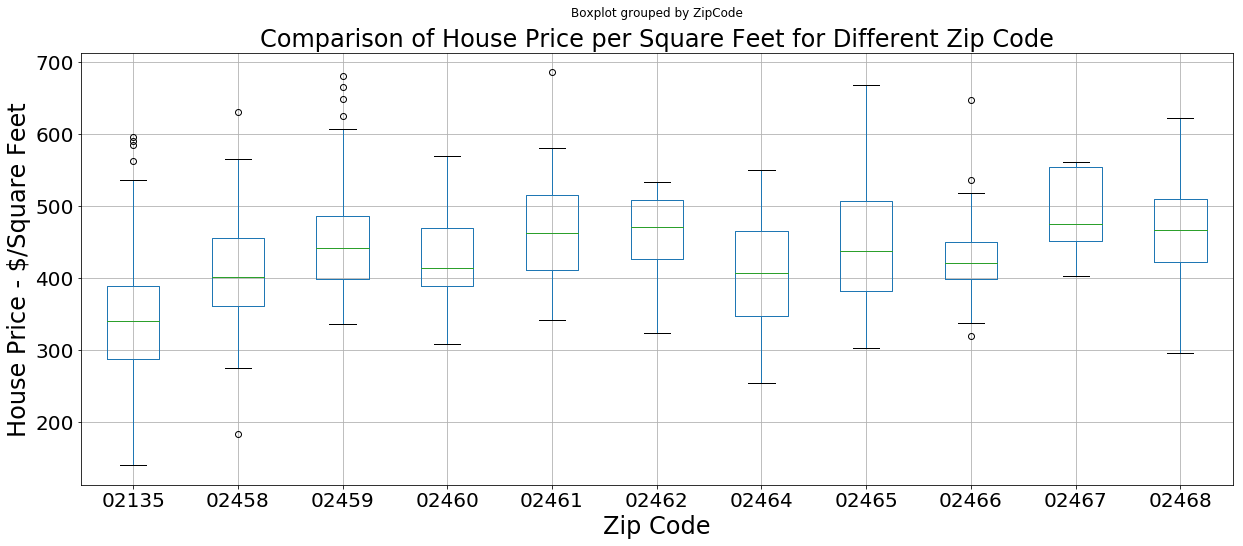

In [38]:
#plotting data
boxplot = cleanHouseDF.boxplot(column = ['$/SQUARE FEET'], by = 'ZipCode', figsize=[20,8], fontsize = 20)
boxplot.set_ylabel('House Price - $/Square Feet', fontsize = 24)
boxplot.set_xlabel('Zip Code', fontsize = 24)
boxplot.set_title('Comparison of House Price per Square Feet for Different Zip Code', fontsize = 24)
boxplot

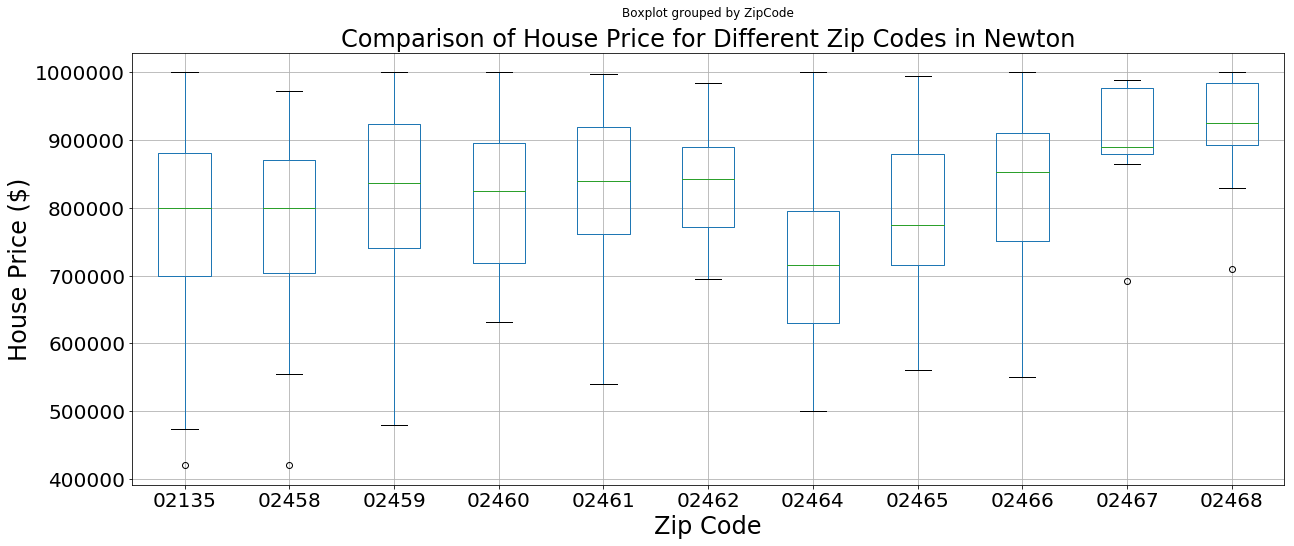

In [39]:
#plotting data
boxplot = cleanHouseDF.boxplot(column = ['PRICE'], by = 'ZipCode', figsize=[20,8], fontsize = 20)
boxplot.set_ylabel('House Price ($)', fontsize = 24)
boxplot.set_xlabel('Zip Code', fontsize = 24)
boxplot.set_title('Comparison of House Price for Different Zip Codes in Newton', fontsize = 24)
boxplot

## Geting and Processing Crime Data

The Newton Police log data can be obtained from their police data website. Each day has a text file of all logs. They are stored at "http://www.newtonpolice.com/POLICE_LOG/CURRENT/20180101.txt", with the date indicates the text file location. The police incident reports do not have zip code information. Since there is limit on how often and how much one can use geopy.geolocator.geocoder without paying, the following steps must be done to extract zip code information from addresses:

1. Extract all the addresses for each date from the website.
2. Save these address to a csv file. 
3. Extract zip code from the address in the csv file of address using batch modes with wait time between each call for geopy.geolocator as well as between each batch. 
4. Each batch mode store the location data into a csv file call "crimelocationx.csv".
5. Extract the zip code in each csv file and add them to a pandas dataframe for analysis. 



In [40]:
from bs4 import BeautifulSoup as BS
import requests
import pandas as pd

In [41]:
from geopy.geocoders import Photon 
geolocator = Photon()
  
def extractAddressfromUrl(url):
    """Extract crime data from newton police data base"""
    results = requests.get(url, headers = {'User-agent': 'your bot 0.1'})
    c = results.content
    addressList = []
    soup = BS(c, "lxml")
    a = soup.body.find_all('p')
    b = a[0].text.split('\r\n') 
    
    for incident in b: 
        if len(incident.split('   ')) > 5:
            c = incident.split('   ')
            if len(c[3])>0:
                address = c[3]
            else:
                address = c[4]
            if ' / ' in address:
                address = address.split(' / ')[1]
            elif '/ ' in address:
                address = address.split('/ ')[1]
            else:
                address = address
            addressList.append(address +', Newton, MA')
    return addressList


Collecting all the addresses from the website. First, create a list of date from January 1st to October  $31^{st}$, 2018 

In [42]:
dateList = pd.date_range('1/1/2018', end = '10/31/2018')
urlBase = 'http://www.newtonpolice.com/POLICE_LOG/CURRENT/'

In [43]:
crimeDfTotal = pd.DataFrame.from_dict({'ZipCode':[], 'counts':[]})
addressList = []
for c, i in enumerate(dateList):
    a = i.strftime('%Y/%m/%d')
    b = a.replace('/','')
    url=urlBase + b + '.txt'
    address= extractAddressfromUrl(url)
    addressList = addressList+address

In [44]:
import csv
crimecsv = 'crime.csv'
with open(crimecsv, "w") as output:
    writer = csv.writer(output, lineterminator ='\n') 
    for val in addressList:
        writer.writerow([val])

Getting the full address including Zip Code. Creating 50 batches of about 490 addresses each. 

In [45]:
import numpy as np
a = np.linspace(194, len(addressList), 50)
b= a.astype(int)
lower = b[0:len(b)-1]
upper = b[1:len(b)]

In [46]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
a =geolocator.geocode(val, limit = 1)

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


Getting the location information from address in batch mode. i = 0 means starting of batch number 1. 

In [47]:
import time

i = 49
for u, p in zip(lower[i:], upper[i:]):
    crime = 'crimelocation'+str(i)+'.csv'
    with open(crime, "w") as output:
        writer = csv.writer(output, lineterminator ='\n') 
        for val in addressList[u:p]:
            location = geolocator.geocode(val, limit = 1)
            if location is None:
                writer.writerow(['No Data'])
            else:
                writer.writerow([location[0]])    
            time.sleep(0.25)
    i+=1
    print(u,p)
    time.sleep(30)

In [48]:
#this code segment below can try to get all the location data in one mode - however, this often failed due
#due to limitaation of geolocator.geocode

In [49]:
#try to get bulk data 
#import pandas as pd
#df = pd.DataFrame({'Name':addressList})
#from geopy.extra.rate_limiter import RateLimiter
#geocode = RateLimiter(geolocator.geocode, max_retries=5, min_delay_seconds=1)
#df['location'] = df['Name'].apply(geocode)

### Extract Zip Codes from Location Data


In [50]:
csvbase = 'crimelocation'
l = [i for i in range(49)]
filenumber = list(l)

In [51]:
dfCrime = pd.DataFrame({'Location':['No Data']})
for number in filenumber:
    csvname = csvbase+str(int(number))+'.csv'
    df = pd.read_csv(csvname, header = None)
    df.columns = ['Location']
    dfCrime = pd.concat([dfCrime, df])

In [52]:
dfCrime.head()

,Location
0,No Data
0,"1563, Beacon Street, Nonantum, Newton, Middles..."
1,No Data
2,"792, Beacon Street, Chestnut Hill, Newton, Mid..."
3,"Newton Police Headquarters Building, 1321, Was..."


In [53]:
dfCrime.shape

(20941, 1)

Removing all row with "No Data" in location

In [54]:
dfCrime = dfCrime[~dfCrime.Location.isin(['No Data'])]

In [55]:
dfCrime.head()

,Location
0,"1563, Beacon Street, Nonantum, Newton, Middles..."
2,"792, Beacon Street, Chestnut Hill, Newton, Mid..."
3,"Newton Police Headquarters Building, 1321, Was..."
5,"Washington Street, Lasell Village, Newton, Mid..."
6,"303, Walnut Street, Nonantum, Newton, Middlese..."


Extract zip code from location and create another column

In [56]:
zipcodeList = []
for location in dfCrime.Location:
    zipcode = location.split(', ')[-2]
    if '-' in zipcode:
        zipcode = zipcode.split('-')[0]
    zipcodeList.append(zipcode)
dfCrimeZipcode = pd.DataFrame({'ZipCode':zipcodeList})
dfCrimeZipcode.head(10)

,ZipCode
0,02468
1,02459
2,02465
3,02462
4,02460
5,02461
6,02458
7,02468
8,02466
9,02464


In [57]:
dfCrimeZipcode.shape

(17636, 1)

In [58]:
value_counts = dfCrimeZipcode['ZipCode'].value_counts()
dfCrimePerZip = value_counts.rename_axis('ZipCode').reset_index(name='Crime counts')

In [59]:
dfCrimePerZip.head(10)

,ZipCode,Crime counts
0,02459,3541
1,02465,2822
2,02458,2750
3,02460,1586
4,02461,1546
5,02466,1154
6,02467,1153
7,02468,978
8,02462,696
9,02464,673


In [60]:
dfCrimePerZip = dfCrimePerZip[dfCrimePerZip.ZipCode.isin(zipCodeList)]

In [61]:
finalCrimePerZip = dfCrimePerZip.reset_index(drop = False)
del finalCrimePerZip['index']
finalCrimePerZip['ZipCode'].astype(int)

0     2459
1     2465
2     2458
3     2460
4     2461
5     2466
6     2467
7     2468
8     2462
9     2464
10    2135
Name: ZipCode, dtype: int64

In [62]:
finalCrimePerZip

,ZipCode,Crime counts
0,02459,3541
1,02465,2822
2,02458,2750
3,02460,1586
4,02461,1546
5,02466,1154
6,02467,1153
7,02468,978
8,02462,696
9,02464,673


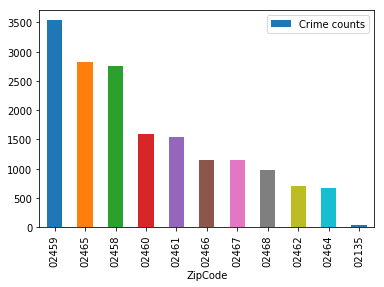

In [63]:
finalCrimePerZip.plot.bar(x = 'ZipCode', y = 'Crime counts')

From the above data, it shows that there is much larger number of police incident reports in zipcode 02459, 02465, and 02458 compared to the rest of the other zip codes. 

## Summary

In [64]:
clusterDf = newton_merged[['Village', 'ZipCode', 'Cluster Labels']]

In [65]:
clusterDf['ZipCode'].astype(int)

0     2135
1     2467
2     2468
3     2466
4     2458
5     2464
6     2462
7     2460
8     2465
9     2459
10    2461
Name: ZipCode, dtype: int64

In [66]:
clusterCrimeDf = clusterDf.set_index('ZipCode').join(finalCrimePerZip.set_index('ZipCode'))

In [67]:
a = clusterCrimeDf.reset_index()
a

,ZipCode,Village,Cluster Labels,Crime counts
0,02135,BRIGHTON,0,30
1,02467,CHESTNUT HILL,1,1153
2,02468,WABAN,1,978
3,02466,AUBURNDALE,1,1154
4,02458,NEWTON,1,2750
5,02464,NEWTON UPPER FALLS,1,673
6,02462,NEWTON LOWER FALLS,0,696
7,02460,NEWTONVILLE,1,1586
8,02465,WEST NEWTON,1,2822
9,02459,NEWTON CENTER,2,3541


In [68]:
housePrice['ZipCode'].astype(int)

0     2135
1     2458
2     2459
3     2460
4     2461
5     2462
6     2464
7     2465
8     2466
9     2467
10    2468
Name: ZipCode, dtype: int64

Summary of different data for all villages. The cluster information is shown.

In [69]:
clusterCrimeHouseDf = a.set_index('ZipCode').join(housePrice.set_index('ZipCode'))
clusterCrimeHouseDf

,Village,Cluster Labels,Crime counts,PRICE,BEDS,BATHS,$/SQUARE FEET
ZipCode,,,,,,,
02135,BRIGHTON,0,30,786717.000000,4.764368,2.416667,346.069364
02467,CHESTNUT HILL,1,1153,903305.555556,3.111111,2.666667,488.111111
02468,WABAN,1,978,917909.090909,3.272727,2.500000,463.454545
02466,AUBURNDALE,1,1154,823431.818182,3.500000,2.386364,432.818182
02458,NEWTON,1,2750,782705.744681,3.340426,2.563830,412.319149
02464,NEWTON UPPER FALLS,1,673,726630.769231,3.205128,2.538462,401.564103
02462,NEWTON LOWER FALLS,0,696,836500.000000,3.166667,2.250000,455.500000
02460,NEWTONVILLE,1,1586,818204.166667,3.375000,2.583333,431.083333
02465,WEST NEWTON,1,2822,781904.081633,3.489796,2.316327,451.285714


The comparison of the data are shown graphically in the following three graphs. Each cluster is represented by one color in the plots. 

In [70]:
colors = {0: 'r', 1: 'g', 2: 'b'}

Text(0.5,1,'Comparison of Incident Reports')

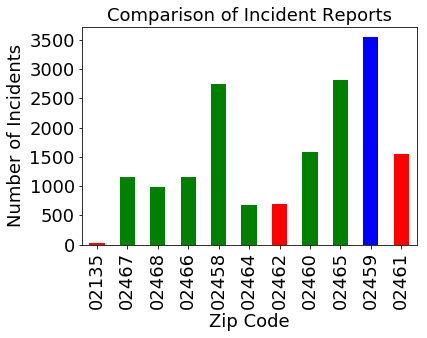

In [71]:
boxplot = clusterCrimeHouseDf['Crime counts'].plot(kind='bar', color=[colors[i] for i in clusterCrimeHouseDf['Cluster Labels']], fontsize = 18)
boxplot.set_ylabel('Number of Incidents', fontsize = 18)
boxplot.set_xlabel('Zip Code', fontsize = 18)
boxplot.set_title('Comparison of Incident Reports', fontsize = 18)

Text(0.5,1,'Comparison of House Price per Square Feet')

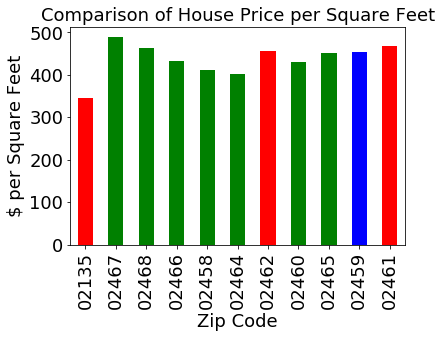

In [72]:
boxplot = clusterCrimeHouseDf['$/SQUARE FEET'].plot(kind='bar', color=[colors[i] for i in clusterCrimeHouseDf['Cluster Labels']], fontsize = 18)
boxplot.set_ylabel('$ per Square Feet', fontsize = 18)
boxplot.set_xlabel('Zip Code', fontsize = 18)
boxplot.set_title('Comparison of House Price per Square Feet', fontsize = 18)

Text(0.5,1,'Comparison of House Price')

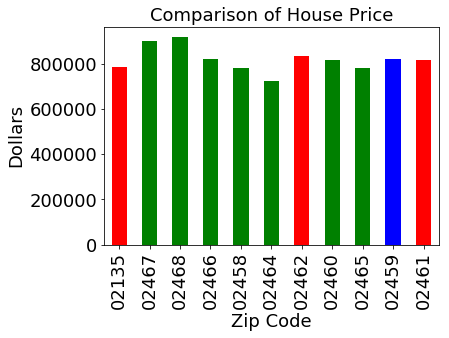

In [73]:
boxplot = clusterCrimeHouseDf['PRICE'].plot(kind='bar', color=[colors[i] for i in clusterCrimeHouseDf['Cluster Labels']], fontsize = 18)
boxplot.set_ylabel('Dollars', fontsize = 18)
boxplot.set_xlabel('Zip Code', fontsize = 18)
boxplot.set_title('Comparison of House Price', fontsize = 18)

From the three plots above, a family can compare different neighborhoods in the same cluster. For example, cluster 1 has three zip codes (02135, 02462 and 02461). Of the three, zip code 02135 has the cheapest house as well as the lowest number of police incident reports. 